In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Загрузка данных
data = pd.read_csv('ab_test_ensembles.csv')

In [38]:
data.head()

,user_id,timestamp,group,variants,converted,location,age_group,user_type
0,9109b0dc-d393-497f-8d63-ba9a25dd16b4,2022-05-21 22:11:48.556739,control,standard,0,United Kingdom,18-25,registered_user
1,2430c3d2-f75b-4b31-8271-51b6a76c2652,2022-05-12 08:01:45.159739,control,standard,0,United Kingdom,42-49,registered_user
2,44788c4e-8dd2-4fad-b986-75e76f4adb64,2022-05-11 16:55:06.154213,treatment,svm_ensemble_v_1_22,0,United Kingdom,26-33,new_user
3,4699a417-506d-41b8-a354-6af6ad576963,2022-05-08 18:28:03.143765,treatment,svm_ensemble_v_1_22,0,United Kingdom,42-49,registered_user
4,304b0d28-bcdf-401a-9dff-66230d3ba0bc,2022-05-21 01:52:26.210827,control,standard,1,United Kingdom,42-49,registered_user


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    294478 non-null  object
 1   timestamp  294478 non-null  object
 2   group      294478 non-null  object
 3   variants   294478 non-null  object
 4   converted  294478 non-null  int64 
 5   location   294478 non-null  object
 6   age_group  294478 non-null  object
 7   user_type  294478 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.0+ MB


In [42]:
data.isnull().sum()

user_id      0
timestamp    0
group        0
variants     0
converted    0
location     0
age_group    0
user_type    0
dtype: int64

In [44]:
# Распределение конверсий по группам
conversion_rates = data.groupby('group')['converted'].mean()
conversion_rates

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

In [61]:
# Конверсия по вариантам
conversion_by_variant = data.groupby('variants')['converted'].mean()
print(conversion_by_variant)

variants
standard               0.120478
svm_ensemble_v_1_22    0.118841
Name: converted, dtype: float64


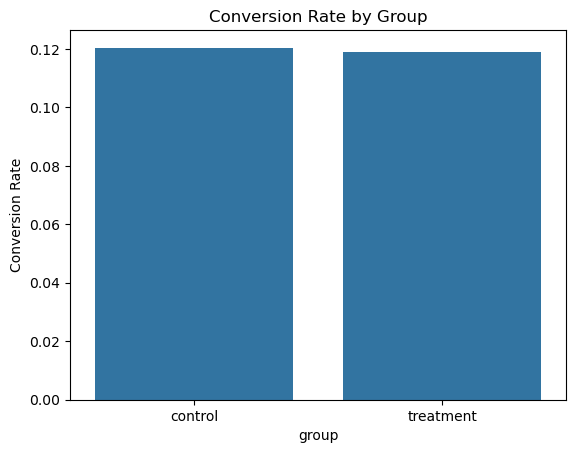

In [46]:
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.show()

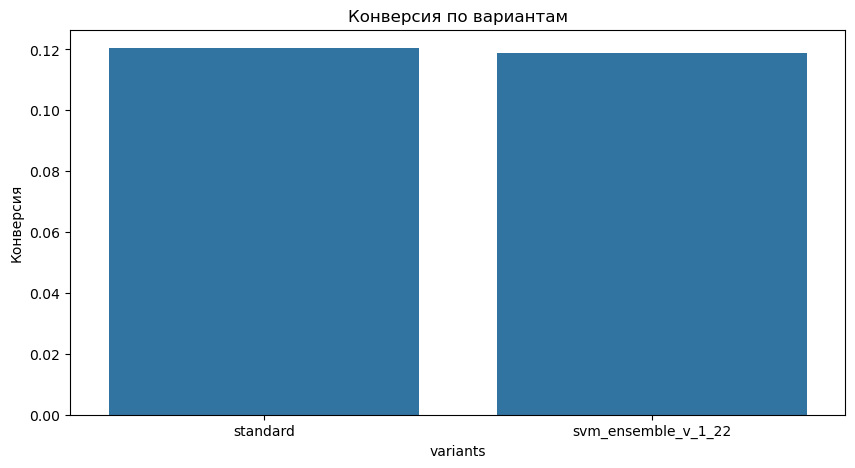

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_by_variant.index, y=conversion_by_variant.values)
plt.title('Конверсия по вариантам')
plt.ylabel('Конверсия')
plt.show()


In [49]:
data.describe()

,converted
count,294478.000000
mean,0.119659
std,0.324563
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [51]:
# Уникальные значения для категориальных переменных
for column in data.select_dtypes(include=['object']).columns:
    print(f"{column}: {data[column].unique()}")

user_id: ['9109b0dc-d393-497f-8d63-ba9a25dd16b4'
 '2430c3d2-f75b-4b31-8271-51b6a76c2652'
 '44788c4e-8dd2-4fad-b986-75e76f4adb64' ...
 'd307b0ad-92a1-409c-a2d2-da8f4a118576'
 'c6bd8da5-2114-4fd4-92c6-e4b11a8be4dc'
 '4bc6ffc3-c33a-4aae-aca1-e4f16b0b94a0']
timestamp: ['2022-05-21 22:11:48.556739' '2022-05-12 08:01:45.159739'
 '2022-05-11 16:55:06.154213' ... '2022-05-22 11:45:03.439544'
 '2022-05-15 01:20:28.957438' '2022-05-16 12:40:24.467417']
group: ['control' 'treatment']
variants: ['standard' 'svm_ensemble_v_1_22']
location: ['United Kingdom']
age_group: ['18-25' '42-49' '26-33' '58+' '34-41' '50-57']
user_type: ['registered_user' 'new_user']


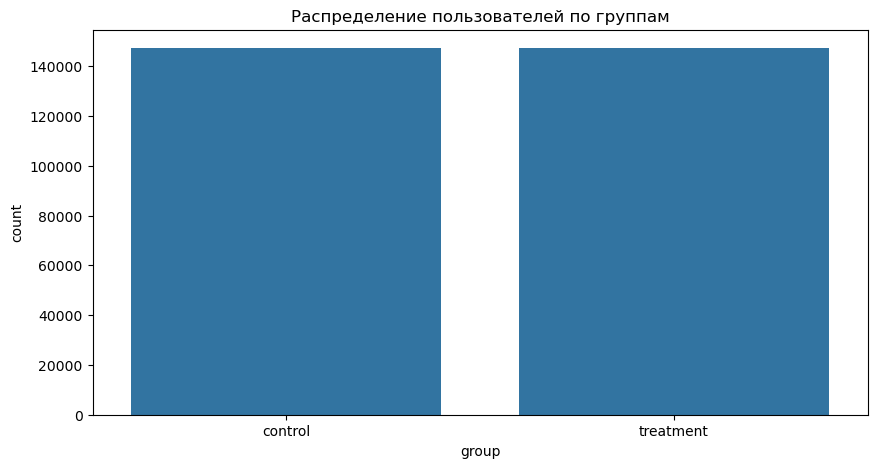

In [55]:
# Распределение по группам
plt.figure(figsize=(10, 5))
sns.countplot(x='group', data=data)
plt.title('Распределение пользователей по группам')
plt.show()

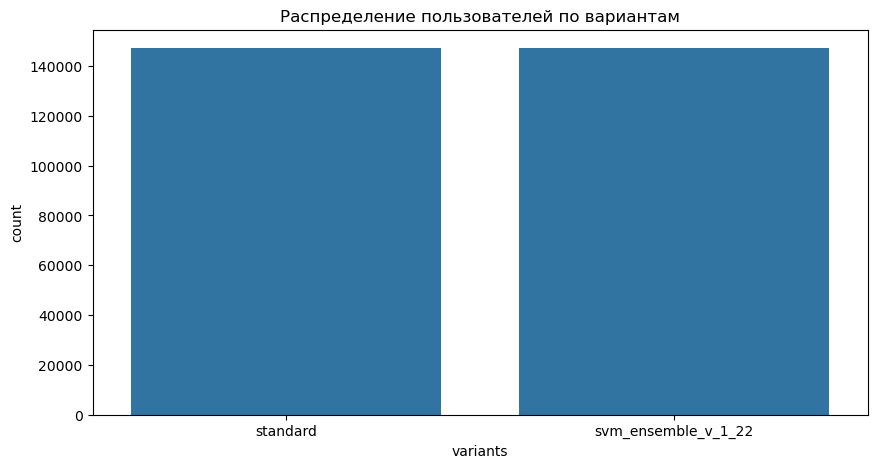

In [57]:
# Распределение по вариантам
plt.figure(figsize=(10, 5))
sns.countplot(x='variants', data=data)
plt.title('Распределение пользователей по вариантам')
plt.show()

age_group
18-25    0.118257
26-33    0.120966
34-41    0.117316
42-49    0.119587
50-57    0.120760
58+      0.121040
Name: converted, dtype: float64
user_type
new_user           0.119154
registered_user    0.120164
Name: converted, dtype: float64


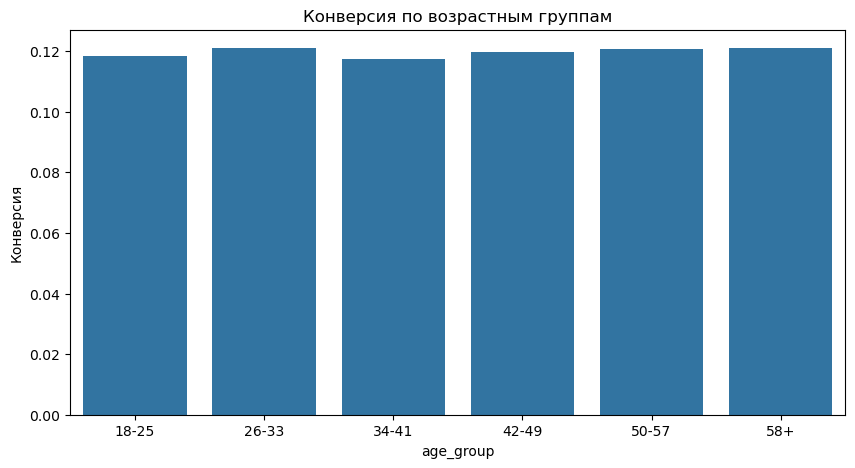

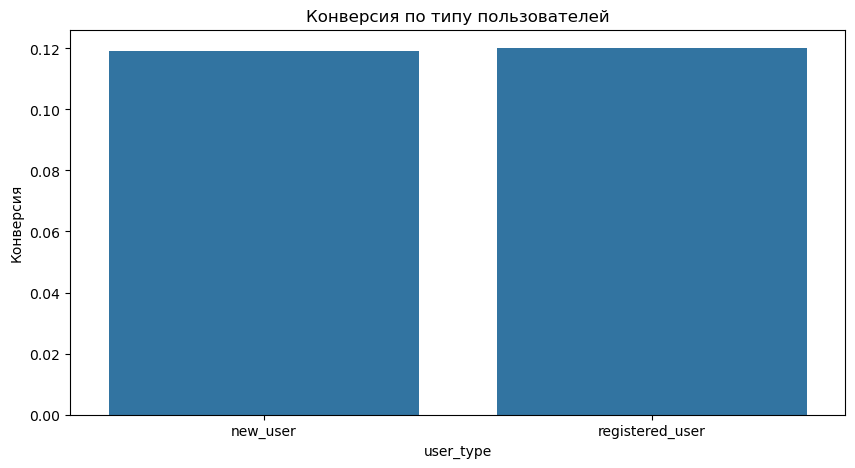

In [65]:
# Конверсия по возрастным группам
conversion_by_age = data.groupby('age_group')['converted'].mean()
print(conversion_by_age)

# Конверсия по типу пользователей
conversion_by_user_type = data.groupby('user_type')['converted'].mean()
print(conversion_by_user_type)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_by_age.index, y=conversion_by_age.values)
plt.title('Конверсия по возрастным группам')
plt.ylabel('Конверсия')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_by_user_type.index, y=conversion_by_user_type.values)
plt.title('Конверсия по типу пользователей')
plt.ylabel('Конверсия')
plt.show()